In [1]:
#r "nuget:ScottPlot, 5.0.*"

Installed Packages ScottPlot, 5.0.56

Loading extensions from `C:\Users\paulf\.nuget\packages\skiasharp\2.88.9\interactive-extensions\dotnet\SkiaSharp.DotNet.Interactive.dll`

In [2]:
using Microsoft.DotNet.Interactive.Formatting;
Formatter.Register(typeof(ScottPlot.Plot), (p, w) => 
    w.Write(((ScottPlot.Plot)p).GetPngHtml(400, 300)), HtmlFormatter.MimeType);

In [3]:
// create sample data
double[] dataX = new double[] { 1, 2, 3, 4, 5 };
double[] dataY = new double[] { 1, 4, 9, 16, 25 };

// plot the data
ScottPlot.Plot plt = new();
plt.Add.Scatter(dataX, dataY);

// display the plot



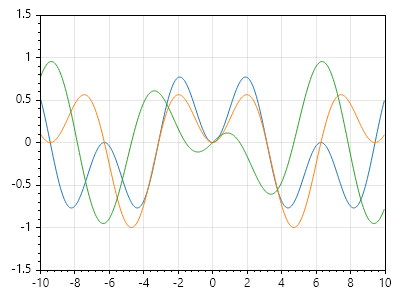

In [4]:
ScottPlot.Plot myPlot = new();

// Functions are defined as delegates with an input and output
static double func1(double x) => (Math.Sin(x) * Math.Sin(x / 2));
static double func2(double x) => (Math.Sin(x) * Math.Sin(x / 3));
static double func3(double x) => (Math.Cos(x) * Math.Sin(x / 5));



// Add functions to the plot
myPlot.Add.Function(func1);
myPlot.Add.Function(func2);
myPlot.Add.Function(func3);

// Manually set axis limits because functions do not have discrete data points
myPlot.Axes.SetLimits(-10, 10, -1.5, 1.5);

myPlot.SavePng("demo.png", 400, 300);
myPlot


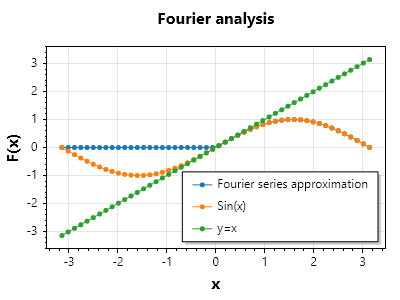

In [5]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 50;
int Harmonics=50;

// 1. Setup data arrays
double xStart = -PI; 
double xEnd = PI; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];

double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
        sum +=  Cos( (Double) (2 * n) * x[i])/ ((Double) (4*n*n -1));
    }
    y[i] = (1/PI)  + 0.5 * Sin(x[i])-  (2/(PI)) * sum;
    sin[i]= Sin(x[i]);
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Fourier series approximation";
var scatter2 = plt.Add.Scatter(x, sin);
    scatter2.LegendText = "Sin(x)";
var scatter3 = plt.Add.Scatter(x, x);
    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 400, 300);
    plt




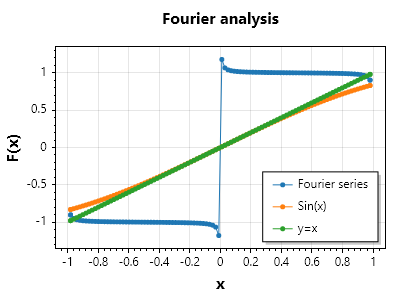

In [6]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 100;
int Harmonics=100;

// 1. Setup data arrays
double xStart = -1; 
double xEnd = 1; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];

double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// remove the interval boundaries
x[0] = xStart + step;
x[pointCount - 1] = xEnd - step;

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
        sum +=  (2* (1-(Pow(-1,n))) / (n *PI)) * Sin( (Double) (PI * n) * x[i]); 
    }
    y[i] =  sum;
    sin[i]= Sin(x[i]);
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Fourier series";
var scatter2 = plt.Add.Scatter(x, sin);
    scatter2.LegendText = "Sin(x)";
var scatter3 = plt.Add.Scatter(x, x);
    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 800, 600);
    plt




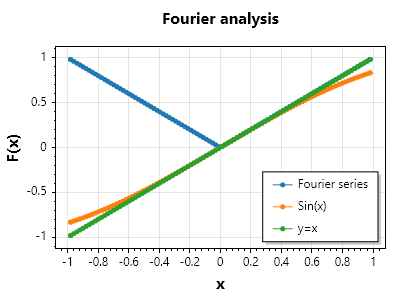

In [7]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 100;
int Harmonics=100;

// 1. Setup data arrays
double xStart = -1; 
double xEnd = 1; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];

double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// remove the interval boundaries
x[0] = xStart + step;
x[pointCount - 1] = xEnd - step;

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
         sum +=  4 / Pow((2*n-1)*PI,2) * Cos( (Double) (PI * ((2 *n) -1)  * x[i])); 
    }
    y[i] =  0.5-sum;
    sin[i]= Sin(x[i]);
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Fourier series";
var scatter2 = plt.Add.Scatter(x, sin);
    scatter2.LegendText = "Sin(x)";
var scatter3 = plt.Add.Scatter(x, x);
    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 800, 600);
    plt



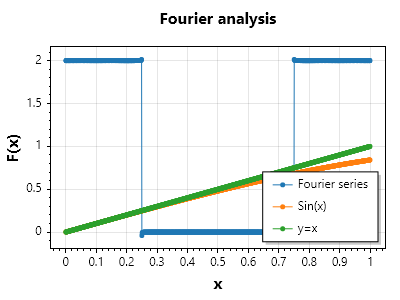

In [8]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 1000;
int Harmonics=10000;

// 1. Setup data arrays
double xStart = 0; 
double xEnd = 1; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];
double A = 2.0;
double d = 0.5;
double T= xEnd - xStart;

double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// remove the interval boundaries
x[0] = xStart + step;
x[pointCount - 1] = xEnd - step;

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
         sum += ( (2 * A) / (n * PI)) * Sin((n * PI * d) / T)  * Cos((n * PI * 2* x[i]) / T);
    }
    y[i]= (A * d) / T  + sum;
    sin[i]= Sin(x[i]);
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Fourier series";
var scatter2 = plt.Add.Scatter(x, sin);
    scatter2.LegendText = "Sin(x)";
var scatter3 = plt.Add.Scatter(x, x);
    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 800, 600);
    plt



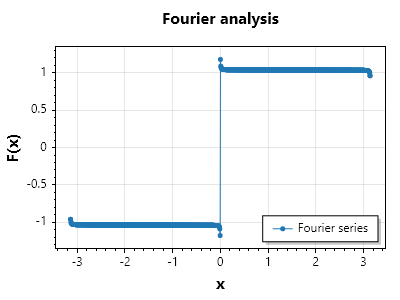

In [9]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 1000;
int Harmonics=1000;

// 1. Setup data arrays
double xStart = -PI; 
double xEnd = PI; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];


double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// remove the interval boundaries
x[0] = xStart + step;
x[pointCount - 1] = xEnd - step;

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n=n+2)
    {
         sum += (1 / (double) n) * Sin(n *x[i]); 
    }
    y[i]= sum + 0.25 * x[i] / Abs(x[i]);
    sin[i]= Sin(x[i]);
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Fourier series";
//var scatter2 = plt.Add.Scatter(x, sin);
//    scatter2.LegendText = "Sin(x)";
//var scatter3 = plt.Add.Scatter(x, x);
//    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 800, 600);
    plt



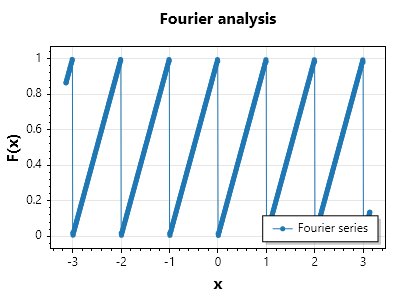

In [10]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 1000;
int Harmonics=1000;

// 1. Setup data arrays
double xStart = -PI; 
double xEnd = PI; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];


double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// remove the interval boundaries
x[0] = xStart + step;
x[pointCount - 1] = xEnd - step;

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
         sum += ((1 / ((double) n *PI))) * Sin((2 * n)  * PI *x[i]);
    }
    y[i]= 0.5 - sum; 
    sin[i]= Sin(x[i]);
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Fourier series";
//var scatter2 = plt.Add.Scatter(x, sin);
//    scatter2.LegendText = "Sin(x)";
//var scatter3 = plt.Add.Scatter(x, x);
//    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 800, 600);
    plt


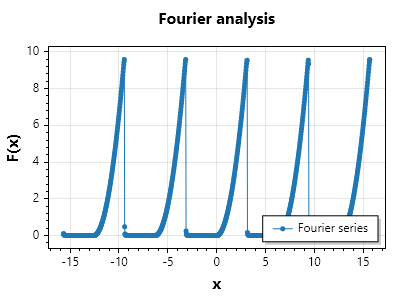

In [11]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 1000;
int Harmonics=1000;

// 1. Setup data arrays
double xStart = -5*PI; 
double xEnd = 5*PI; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];


double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// remove the interval boundaries
x[0] = xStart + step;
x[pointCount - 1] = xEnd - step;

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
         sum += ((2 * Math.Pow(-1,n)) / ((double)(n * n))) * Cos(n  *x[i]);
         sum += ( (((Math.Pow(-1,n+1)*PI) / ((double)(n))) ) +
                  (((2*Math.Pow(-1,n)-2) / ((double)(n*n*n*PI))) ))
         
                * Sin( n  *x[i]);
    }
    y[i]= ((PI*PI)/ (double) 6) + sum; 
    sin[i]= Sin(x[i]);
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Fourier series";
//var scatter2 = plt.Add.Scatter(x, sin);
//    scatter2.LegendText = "Sin(x)";
//var scatter3 = plt.Add.Scatter(x, x);
//    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 800, 600);
    plt


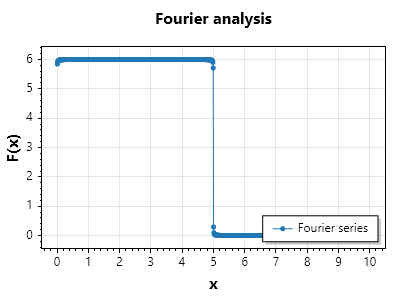

In [12]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 1000;
int Harmonics=1000;

// 1. Setup data arrays
double xStart = 0; 
double xEnd = 10; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];


double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// remove the interval boundaries
x[0] = xStart + step;
x[pointCount - 1] = xEnd - step;

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
         sum += Sin(0.2 * ((2*n)-1)  *PI * x[i])/((Double)((2*n)-1));
    }
    y[i]= 3 + (12/PI)* sum; 
    sin[i]= Sin(x[i]);
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Fourier series";
//var scatter2 = plt.Add.Scatter(x, sin);
//    scatter2.LegendText = "Sin(x)";
//var scatter3 = plt.Add.Scatter(x, x);
//    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 800, 600);
    plt


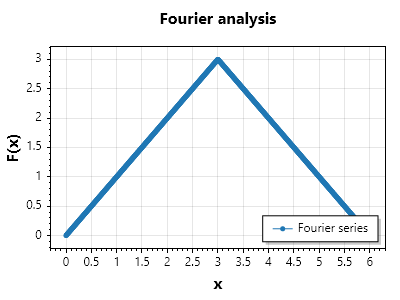

In [13]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 1000;
int Harmonics=1000;

// 1. Setup data arrays
double xStart = 0; 
double xEnd = 6; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];


double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// remove the interval boundaries
//x[0] = xStart + step;
//x[pointCount - 1] = xEnd - step;

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
         sum += Cos(( 1/(Double) 3) * ((Double)(2*n)-1)  *PI * x[i])/ 
         (Double) ((Pow((2 * n -1 ),2))*Pow(PI,2)); 
    }
    y[i]= 1.5 - 12 * sum; 
    sin[i]= Sin(x[i]);
}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Fourier series";
//var scatter2 = plt.Add.Scatter(x, sin);
//    scatter2.LegendText = "Sin(x)";
//var scatter3 = plt.Add.Scatter(x, x);
//    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 800, 600);
    plt


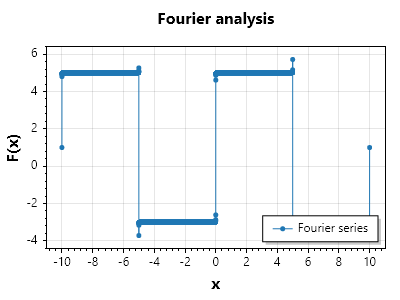

In [68]:
using ScottPlot;
using System;
using static System.Math;
int pointCount = 10000;
int Harmonics=10000;
int PeriodLength=10;
int B= -3;
int A= 5;
Double omega= (2*PI) / ((Double)   PeriodLength);

// 1. Setup data arrays
double xStart = PeriodLength; 
double xEnd = -PeriodLength; 
double [] x= new double[pointCount];
double [] y = new double[pointCount];
double [] sin = new double[pointCount];


double step = (xEnd - xStart) / (pointCount - 1);

for (int i=0; i<pointCount; i++)
{
    x[i] = xStart + i * step;
}

// remove the interval boundaries
//x[0] = xStart + step;
//x[pointCount - 1] = xEnd - step;

// 2. Calculate Fourier series approximation of a function
for (int i = 0; i < pointCount; i++)
{
    double sum = 0;
    for (int n=1;n<Harmonics;n++)
    {
        if (n % 2 == 0) continue;
         Double teller=  ((Double)(A-B))* Sin(( omega * (Double)n * x[i]));
         Double noemer= (Double) (n)*PI;

         sum += (teller/noemer); 
    }

    y[i]= 0.5 * (Double) (A+B) + (2 *(Double)sum); 
    sin[i]= Sin(x[i]);

}



// 3. Plot with ScottPlot
ScottPlot.Plot plt = new ();
var scatter = plt.Add.Scatter(x, y);
    scatter.LegendText = "Fourier series";
//var scatter2 = plt.Add.Scatter(x, sin);
//    scatter2.LegendText = "Sin(x)";
//var scatter3 = plt.Add.Scatter(x, x);
//    scatter3.LegendText = "y=x";
    plt.Title("Fourier analysis");
    plt.XLabel("x");
    plt.YLabel("F(x)");

    plt.SavePng("demo.png", 800, 600);
    plt